### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** `PLEASE ENTER YOUR NAME(S) HERE`
<br>
**Student ID(s):** `PLEASE ENTER YOUR ID(S) HERE`



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [497]:
from functools import partial
from typing import Callable

import numpy as np
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split

In [498]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
def preprocess(filename: str, label_column_name: str) -> [pd.DataFrame,
                                                          pd.DataFrame,
                                                          pd.DataFrame,
                                                          pd.Series,
                                                          pd.Series]:
    """
    preprocess takes a fillename and the name of the label column (in the assigment "label", in the lecture examples "Diagnosis")
    and returns a pandas dataframe of the data with all leading and trailing whitespaces removed
    :param filename: the name of the file to open
    :param label_column_name: the name of the column with the class labels
    :return:
        rawdata: pandas.DataFrame: a raw copy of the un-split data
        x_train: pandas.DataFrame: training data
        x_test: pandas.DataFrame: testing data
        y_train: pandas.Series: class labels for training data
        y_test: pandas.Series: class labels for testing data
    """
    rawdata: pd.DataFrame = pd.read_csv(filename)
    # This removes all the leading and trailing whitespaces from the csv file
    rawdata = rawdata.applymap(
        lambda x: x.strip(" ") if isinstance(x, str) else x)
    data = rawdata.copy()
    labels = data.pop(label_column_name)
    x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                        test_size=0.1,
                                                        shuffle=False)
    return rawdata, x_train, x_test, y_train, y_test

In [499]:
def get_frequency(m: {}, class_name: str) -> float:
    """
    get_frequency returns a decimal percentage of the amount that class_key makes up
    :param m:  dictionary of class:count
    :param key: class key
    :return: decimal percentage of class in m
    """
    if class_name not in m.keys():
        raise KeyError(class_name)
    class_count = m[class_name]
    total = sum(m.values())
    return float(class_count) / float(total)


def is_numeric(x) -> bool:
    """
    isnumeric returns true if x is a number type
    :param x: a variable
    :return: true if x is a numeric type
    """
    return isinstance(x, (int, float, np.int64))


def gaussian(**kwargs: int) -> float:
    """
    gaussian calculates the floating point result from stdev, mean, and an x value
    :param kwargs: input optional fields
    :return: value of x on the gaussian distribution
    """
    stdev = kwargs.get("stdev")
    mean = kwargs.get("mean")
    x = kwargs.get("x")
    return (1 / (stdev * np.sqrt(2 * np.pi))) * np.e ** (
            -1 / 2 * ((x - mean) / stdev) ** 2)


class Model:
    """
    Model is a class that abstracts the calculation of the prior probabilities, conditional probabilities as well as storing the gaussian distribution information (mean, stdev).
    """
    priors: {str: int} = {}
    conditionals_probs: {str: {}} = {}
    gaussian_params: {str: {str: (float, float)}} = {}
    x_train: pd.DataFrame = None
    y_train: pd.DataFrame = None


    def prior_probability(self, class_name: str) -> float:
        """
        prior_probability returns the prior probability for a class
        :param class_name: the name of the class
        :return: the floating point prior probability of the class
        """
        return get_frequency(self.priors, class_name)

    def conditionals(self, column_name: str, x, class_name: str,
                     method: Callable[..., float]):
        """
        conditionals calculates the conditional probabilities
        :param column_name: The name of the column/attribute
        :param x: The new attribute instance who's conditional probability is being calculated
        :param class_name: The class name
        :param method: A callable method that is being used to calculate continuous distributions,
        this function is passed the following parameters:
            x: The attribute instance that is being calculated
            stdev: The standard deviation of the attribute's distribution
            mean: The mean of the attribute's distribution
            samples: The samples from the attribute that are are of class "class_name".
        from all this information both gaussian and kde values can be calculated.
        :return:
        """
        # if the column/attribute name is not in the conditional probability keys then
        # there's a huge issue
        if column_name not in self.conditionals_probs.keys():
            raise KeyError(column_name)
        # if the class name isn't in the training set then there is also a problem
        if class_name not in self.conditionals_probs[column_name].keys():
            raise KeyError(class_name)
        # if x is numeric then we will calculate the y value using our distribution
        # method that is passed in
        if is_numeric(x):
            ave, std = self.gaussian_params[column_name][class_name]
            return method(x=x,
                          stdev=std,
                          mean=ave,
                          samples=model.x_train[column_name][model.y_train == class_name])
        # if x is not in the conditional probabilities then return an incremental probability
        # this is equivalent to if the value was seen once in the training data set
        if x not in self.conditionals_probs[column_name][class_name].keys():
            return 1 / sum(self.priors.values())
        # else return the frequency of the conditional probability
        return get_frequency(self.conditionals_probs[column_name][class_name],
                             x)



In [500]:
# This function should calculate prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model
def train(x_train: pd.DataFrame, y_train: pd.Series) -> Model:
    """
    train trains the model and returns a Model class that can then be passed into other functions.
    :param x_train: The training attributes
    :param y_train: The training labels
    :return: A Model of the training data
    """
    model = Model()
    model.priors = y_train.value_counts().to_dict()
    model.x_train = x_train
    model.y_train = y_train

    for column_name in x_train:
        # if the first instance of the column/attribute is numeric we will
        # take the mean and standard deviation
        column = x_train[column_name]
        if len(column) > 0 and is_numeric(column.values[0]):
            model.gaussian_params[column_name] = {}
            for key in model.priors.keys():
                samples = [elem for i, elem in
                           enumerate(x_train[column_name]) if
                           y_train.values[i] == key]
                model.gaussian_params[column_name][key] = (
                    np.mean(samples), np.std(samples, ddof=1))
        # calculate the conditional probabilities
        model.conditionals_probs[column_name] = {}
        for i, elem in enumerate(x_train[column_name]):
            label = y_train.values[i]
            # if the elem if empty then append the index so that
            # it is unique from all the other missing values
            if elem == "?":
                elem = f"{elem}{i}"
            # create a map structure of [column_name][class_type][element]
            # for example ['age']['<50'][30] == 17 or
            # for example ['work']['<50'][State-Gov] == 32
            if label not in model.conditionals_probs[column_name].keys():
                model.conditionals_probs[column_name][label] = {}
            if elem not in model.conditionals_probs[column_name][
                label].keys():
                model.conditionals_probs[column_name][label][elem] = 1
            else:
                model.conditionals_probs[column_name][label][elem] += 1
    return model

In [501]:


def predict_one(test: pd.Series,
                model: Model,
                all_vals: [],
                method: Callable[..., float]):
    """
    predict_one predicts a single instance
    :param test: pandas.DataFrame a single test instance
    :param model: The trained model
    :param all_vals: a list to append the result to
    :param method: The method to use for continuous numeric attributes
    """
    vals: [(str, float)] = []

    # prior_key will be all of the labels (<50k, >=50k) for example
    for prior_key in model.priors.keys():
        prob = np.log(model.prior_probability(prior_key))

        # key will be the attribute name, val will be the attribute value
        for key, val in test.to_dict().items():
            a = model.conditionals(key, val, prior_key, method)
            prob += np.log(a)
        vals.append((prior_key, prob))
    vals.sort(key=lambda x: x[1], reverse=True)
    all_vals.append((vals[0][0], vals))


# This function should predict classes for new items in the testing data
def predict(tests: pd.DataFrame,
            model: Model,
            method: Callable[..., float]) -> [str, [(str, float)]]:
    """
    predict predicts the model with test data with method as the function that calculates continuous numeric attributes
    :param tests: pandas DataFrame of test data, without the label column.
    :param model: A Model that has been trained
    :param method: A function to calculate the continuous distribution of numeric attributes that is passed the following parameters"
            x: The attribute instance that is being calculated
            stdev: The standard deviation of the attribute's distribution
            mean: The mean of the attribute's distribution
            samples: The samples from the attribute that are of class "class_name".
    :return:
        str: The predicted classification of the test data
        list: A sorted tuple of the class and its log probability ranking
    """
    all_vals: [[(str, float)]] = []
    partial_predict_one = partial(predict_one,
                                  model=model,
                                  method=method,
                                  all_vals=all_vals)
    tests.apply(partial_predict_one, axis=1)
    return all_vals

In [502]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.
def evaluate(actual: [], predicted: [], positive, negative) -> [pd.DataFrame,
                                                                float, float]:
    """
    evaluate evaluates the models' performance from expected and actual classifications
    :param actual: The actual classification that are expected
    :param predicted: What the model predicted
    :param positive: The class that is considered to be the positive case (for example "<=50K")
    :param negative: The class that is considered to be the negative case (for example ">50K")
    :return:
        list: An evaluation matrix
        float: the accuracy of the model
        float: the f1 score of the model
    """
    tp, fn, fp, tn = 0, 0, 0, 0
    for i, elem in enumerate(predicted):
        if elem == actual[i] == positive:
            tp += 1
        if elem == actual[i] == negative:
            tn += 1
        if elem != actual[i] == positive:
            fn += 1
        if elem != actual[i] == negative:
            fp += 1
    accuracy = (tp + tn) / len(predicted)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f = (2 * precision * recall) / (precision + recall)
    columnlabels = ["predicted positive", "predicted negative"]
    indexlabels = ["actual positive", "actual negative"]
    confusion_matrix = pd.DataFrame([[tp, fn], [fp, tn]],
                                    columns=columnlabels,
                                    index=indexlabels)
    return confusion_matrix, accuracy, f


In [503]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation results. [0.33 marks]

# First, read in the data and apply your NB model to the ADULT data
print(f"Gaussian Naive Bayes")

# type hint these variables so that code is easier to read/develop
x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

# Because the coe is generic we need to specify what labels are being used
positive_label = "<=50K"
negative_label = ">50K"
label_name = "label"

data, x_train, x_test, y_train, y_test = preprocess("adult.csv", label_name)

model = train(x_train, y_train)

# pass in the gaussian function to the predict function
results = predict(x_test, model, gaussian)

# Second, print the full evaluation results from the "evaluate()" function
predicted = [result[0] for result in results]

confusion_m, accuracy, f1 = evaluate(y_test.values, predicted,
                                     positive=positive_label,
                                     negative=negative_label)

print(f"confusion_matrix:\n{confusion_m}\n")
print(f"accuracy: {accuracy}")
print(f"f_score : {f1}\n")

# Third, print data statistics and model predictions, as instructed below
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)
# of the first three records in adult.csv

print("Attribute vectors of instances [0, 1, 2]: \n", x_train.head(3))

print("\nNumber of instances (N): ", len(x_train.values) + len(x_test.values))
print("Number of attributes (F): ", len(x_train.keys()))
print("Number of labels (L): ", len({e for e in y_test.values}))

# print out the prediction results of the last three instances
print("\n\nPredicted class log-probabilities for instance N-3: ",
      results[-3][-1])
print("Predicted class ID for instance N-3: ", results[-3][0])
print("\nPredicted class log-probabilities for instance N-2: ",
      results[-2][-1])
print("Predicted class ID for instance N-2: ", results[-2][0])
print("\nPredicted class log-probabilities for instance N-1: ",
      results[-1][-1])
print("Predicted class ID for instance N-1: ", results[-1][0])

Gaussian Naive Bayes
confusion_matrix:
                 predicted positive  predicted negative
actual positive                  69                   8
actual negative                   6                  17

accuracy: 0.86
f_score : 0.9078947368421053

Attribute vectors of instances [0, 1, 2]: 
    age        work class  education  education num      marital status  \
0   68                 ?    1st-4th              2            Divorced   
1   39         State-gov  Bachelors             13       Never-married   
2   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   

        occupation   relationship   race     sex  hours per week  \
0                ?  Not-in-family  White  Female              20   
1     Adm-clerical  Not-in-family  White    Male              40   
2  Exec-managerial        Husband  White    Male              13   

  native country (region)  
0           United-States  
1           United-States  
2           United-States  

Number of instances 

## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance.

In [504]:
def sensitivity_specificity(confusion_matrix: pd.DataFrame) -> [float, float]:
    tp, fn = confusion_matrix.values[0][0], confusion_matrix.values[0][1]
    fp, tn = confusion_matrix.values[1][0], confusion_matrix.values[1][1]
    return tp / (tp + fn), tn / (tn + fp)


sensitivity, specificity = sensitivity_specificity(confusion_m)
print(f"sensitivity: {sensitivity}")
print(f"specificity: {specificity}")

sensitivity: 0.8961038961038961
specificity: 0.7391304347826086


Provide your text answer of 150-200 words in this cell.

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

KDE Naive Bayes

Part a

confusion_matrix:
                 predicted positive  predicted negative
actual positive                  64                  13
actual negative                   4                  19

accuracy: 0.83
f_score : 0.8827586206896552



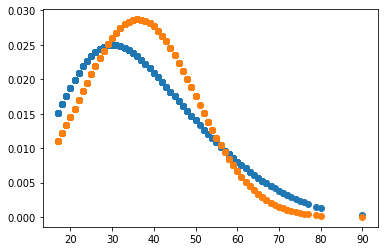

In [505]:
from matplotlib import pyplot as plt

# Write additional code here, if necessary (you may insert additional code cells)
print(f"KDE Naive Bayes\n")
print(f"Part a\n")


def kde(chosen_stdev, **kwargs: float) -> float:
    """
    kde takes in a
    :param chosen_stdev: The manually chosen stdev to calculate the cluster density function.
    :param kwargs: Variadic input, of which
            x: The current numeric data point
            samples: A list of all the samples in the correct class
    :return: A float of the calculated probability.
    """
    x = kwargs.get("x")
    samples = kwargs.get("samples")
    s = 0
    for xi in samples:
        s += gaussian(x=x - xi, stdev=chosen_stdev, mean=0)
    return (1 / len(samples)) * s


results_kde = predict(x_test, model, partial(kde, 9))
# Second, print the full evaluation results from the evaluate() function
predicted_kde = [result[0] for result in results_kde]
confusion_m_kde, accuracy_kde, f1_kde = evaluate(y_test.values, predicted_kde,
                                                 positive=positive_label,
                                                 negative=negative_label)
y_gauss = []
y_kde = []
samples = model.x_train["age"][model.y_train == positive_label]
ave, std = model.gaussian_params["age"][positive_label]
for x in samples.tolist():
    y_kde.append(kde(9, x=x, samples=samples.tolist(), mean=ave, stdev=std))
    y_gauss.append(gaussian(x=x, samples=samples.tolist(), mean=ave, stdev=std))

plt.scatter(samples.tolist(), y_kde)
plt.scatter(samples.tolist(), y_gauss)



print(f"confusion_matrix:\n{confusion_m_kde}\n")
print(f"accuracy: {accuracy_kde}")
print(f"f_score : {f1_kde}\n")

In [506]:
from sklearn.model_selection import KFold

for k in [2, 10]:
    kf = KFold(n_splits=k, random_state=None)
    data2 = data.copy()
    y_data = data2.pop("label")
    score = []
    ave_acc, ave_f1 = np.array([]), np.array([])
    ave_sensitivity, ave_specificity = np.array([]), np.array([])
    for trainidx, testidx in kf.split(data2, y_data):
        x_train = data2.iloc[trainidx]
        y_train = y_data.iloc[trainidx]
        model = train(x_train, y_train)
        x_test = data2.iloc[testidx]
        y_test = y_data.iloc[testidx]
        results = predict(x_test, model, partial(kde, 9))
        predicted = [result[0] for result in results]
        confusion_m, accuracy, f1 = evaluate(y_test.values, predicted,
                                             positive=positive_label,
                                             negative=negative_label)
        sensitivity, specificity = sensitivity_specificity(confusion_m)
        ave_acc = np.append(ave_acc, accuracy)
        ave_f1 = np.append(ave_f1, f1)
        ave_sensitivity = np.append(ave_sensitivity, sensitivity)
        ave_specificity = np.append(ave_specificity, specificity)
    print(f"k fold validation, k={k}")
    print(f"average accuracy: {ave_acc.mean()}")
    print(f"average ave_f1: {ave_f1.mean()}")
    print(f"average sensitivity: {sensitivity.mean()}")
    print(f"average specificity: {specificity.mean()}")
    print()






k fold validation, k=2
average accuracy: 0.803
average ave_f1: 0.864996974332568
average sensitivity: 0.8324607329842932
average specificity: 0.6864406779661016

k fold validation, k=10
average accuracy: 0.8029999999999999
average ave_f1: 0.863790373135007
average sensitivity: 0.8311688311688312
average specificity: 0.8260869565217391



Provide your text answer of 150-200 words in this cell.

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

In [507]:
# Write additional code here, if necessary (you may insert additional code cells)

Provide your text answer of 150-200 words in this cell.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [508]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: [Enter your full name and student number here before submission]
   
   <b>Dated</b>: [Enter the date that you "signed" the declaration]